### <center>MUHAMMAD DZAKI AL-QUSHOYYI</center>
#### <center>F1D022143</center>

# Here you can put your extraordinary code

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

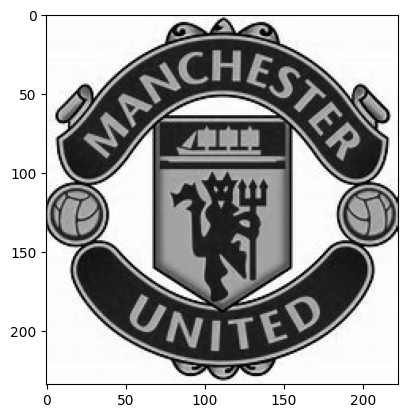

In [71]:
image = plt.imread('../assets/manchester_united.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [72]:
image

array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

In [73]:
def FilterModus(image, baris, kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image, ((_baris, _baris), (_kolom, _kolom)), mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            Modus = _image[i:i+baris, j:j+kolom]
            index = np.zeros(256)  # Perbarui ukuran array index menjadi 256
            for k in range(Modus.shape[0]):
                for l in range(Modus.shape[1]):
                    index[Modus[k, l]] += 1
            Max = np.max(index)
            for m in range(index.shape[0]):
                if Max == index[m]:
                    _Max = m
            hasil[i, j] = _Max
    return hasil

In [74]:
def FilterMedian(image,baris,kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=_image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

In [75]:
def FilterMean(image,baris,kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum(_image[i:i+baris,j:j+kolom])/(baris*kolom)
            hasil[i,j] =ratarata
    return hasil


In [76]:
def sharpen(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv.filter2D(image, -1, kernel)
    return sharpened_image

In [89]:
def smooth(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv.filter2D(image, -1, kernel)
    return smoothed_image


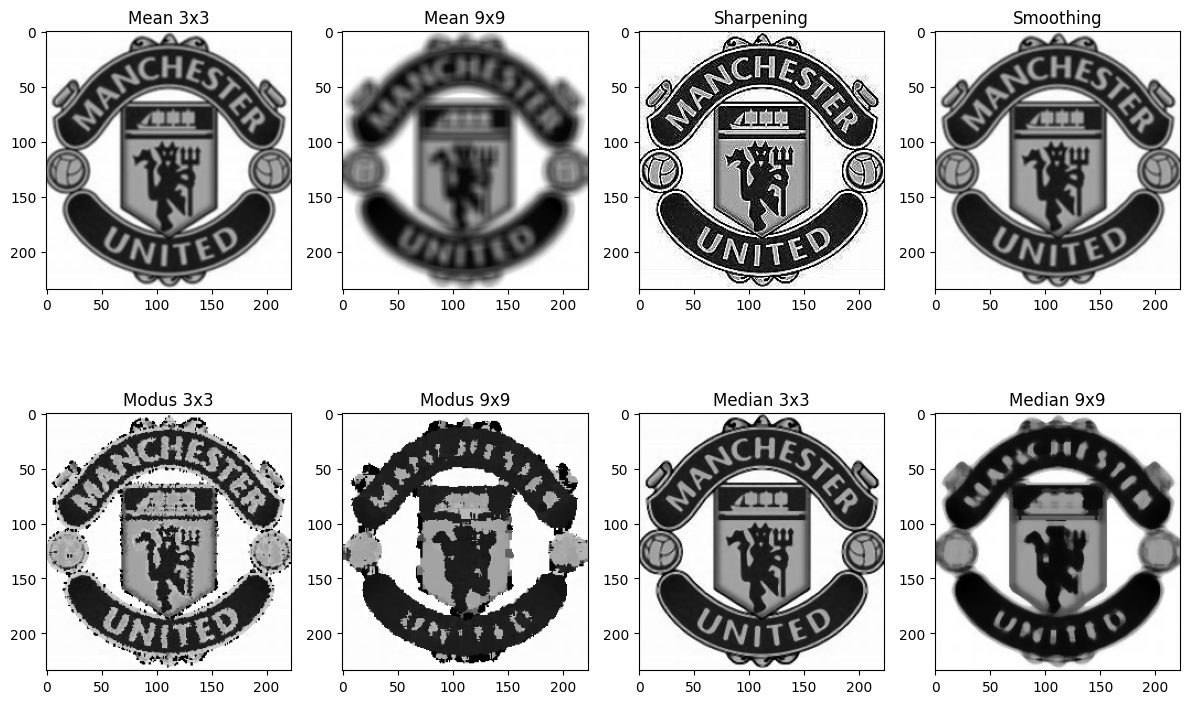

In [95]:
Mn1 = FilterMean(image, 3, 3)
Mn2 = FilterMean(image, 9, 9)
sp1 = sharpen(image)
smot1 = smooth(image, kernel_size=3) 
MS1 = FilterModus(image, 3, 3)
MS2 = FilterModus(image, 9, 9)
MD1 = FilterMedian(image, 3, 3)
MD2 = FilterMedian(image, 9, 9)

plt.figure(figsize=(12, 8)) 

plt.subplot(2, 4, 1) 
plt.title('Mean 3x3')
plt.imshow(Mn1, cmap="gray")

plt.subplot(2, 4, 2) 
plt.title('Mean 9x9')
plt.imshow(Mn2, cmap="gray")

plt.subplot(2, 4, 3) 
plt.title('Sharpening') 
plt.imshow(sp1, cmap="gray") 

plt.subplot(2, 4, 4) 
plt.title('Smoothing')  
plt.imshow(smot1, cmap="gray") 

plt.subplot(2, 4, 5) 
plt.title('Modus 3x3')
plt.imshow(MS1, cmap="gray")

plt.subplot(2, 4, 6)  
plt.title('Modus 9x9')
plt.imshow(MS2, cmap="gray")

plt.subplot(2, 4, 7) 
plt.title('Median 3x3')
plt.imshow(MD1, cmap="gray")

plt.subplot(2, 4, 8) 
plt.title('Median 9x9')
plt.imshow(MD2, cmap="gray")

plt.tight_layout()
plt.show()
